<a href="https://colab.research.google.com/github/da-head0/Female-led-Korean-Films/blob/master/Game_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Ï†ÑÏ≤òÎ¶¨

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df

Unnamed: 0  ... Other_Sales
0               1  ...           0
1               2  ...        0.01
2               3  ...           0
3               4  ...           0
4               5  ...        0.04
...           ...  ...         ...
16593       16594  ...        0.01
16594       16595  ...           0
16595       16596  ...        0.13
16596       16597  ...        0.03
16597       16598  ...        0.01

[16598 rows x 10 columns]

In [3]:
del df['Unnamed: 0']

In [4]:
sales_df = df[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]

In [5]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [6]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
#Í∏∞Ï°¥ YearÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î∞îÌÉïÏúºÎ°ú NaNÍ∞íÏùÑ Ï±ÑÏõåÏ§å

df.Year = df.Year.interpolate(method='pad', limit=2) 

In [8]:
#Year Ìñâ Ï†ïÏàòÎ°ú Î≥ÄÌôò

df = df.astype({'Year': 'int'}) 

In [9]:
# Ïó∞ÎèÑ ÎßûÏ∂∞Ï£ºÍ∏∞

for i, year in enumerate(df['Year']):
  if year <50:
    df.loc[i,'Year'] = year + 2000
  if (50<= year <100 ):
    df.loc[i,'Year'] = year + 1900
  else:
    continue


In [10]:
df.groupby(by='Year').count().head(60)

Name  Platform  Genre  ...  EU_Sales  JP_Sales  Other_Sales
Year                         ...                                 
1980    10        10      9  ...        10        10           10
1981    46        46     46  ...        46        46           46
1982    37        37     37  ...        37        37           37
1983    17        17     17  ...        17        17           17
1984    14        14     14  ...        14        14           14
1985    14        14     14  ...        14        14           14
1986    21        21     21  ...        21        21           21
1987    16        16     16  ...        16        16           16
1988    15        15     15  ...        15        15           15
1989    18        18     18  ...        18        18           18
1990    16        16     16  ...        16        16           16
1991    41        41     41  ...        41        41           41
1992    43        43     43  ...        43        43           43
1993    63        63     63  ...        63        63           63
1994   122       122    122  ...       122       122          122
1995   221       221    221  ...       221       221          221
1996   267       267    266  ...       267       267          267
1997   293       293    293  ...       293       293          293
1998   386       386    384  ...       386       386          386
1999   346       346    344  ...       346       346          346
2000   354       354    353  ...       354       354          354
2001   489       489    487  ...       489       489          489
2002   844       844    841  ...       844       844          844
2003   790       790    789  ...       790       790          790
2004   768       768    764  ...       768       768          768
2005   954       954    952  ...       954       954          954
2006  1021      1021   1018  ...      1021      1021         1021
2007  1230      1230   1224  ...      1230      1230         1230
2008  1452      1452   1447  ...      1452      1452         1452
2009  1453      1453   1450  ...      1453      1453         1453
2010  1280      1280   1276  ...      1280      1280         1280
2011  1159      1159   1156  ...      1159      1159         1159
2012   667       667    664  ...       667       667          667
2013   556       556    555  ...       556       556          556
2014   589       589    589  ...       589       589          589
2015   629       629    626  ...       629       629          629
2016   353       353    353  ...       353       353          353
2017     3         3      3  ...         3         3            3
2020     1         1      1  ...         1         1            1

[39 rows x 8 columns]

In [11]:
for col in sales_df.columns:
  df[col] = df[col].str.replace('M','')  # remove M

In [12]:
# KÍ∞í ÏßÄÏö∞Í≥† Ìï¥Îãπ Ïó¥Ïóê ÎåÄÌï¥ 0.001Î∞∞
for col in sales_df.columns:
  for i, sale in enumerate(df[col]):
    if sale.endswith('K'):
      df.loc[i,col] = float(df.loc[i,col].replace('K',''))*0.001
    else:
      continue

In [13]:
# Sales ÏπºÎüºÎì§ Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôò
for col in sales_df.columns:
  df[col] = pd.to_numeric(df[col])
  df[col] = df[col]*1000 #Í∏∞Î≥∏ Îã®ÏúÑÎ•º KÎ°ú Î≥ÄÍ≤Ω

In [14]:
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [15]:
df['Name'] = df['Name'].str.replace('Ï±ï','e') #Ïù¥Î¶ÑÏóê ÌïúÍ∏Ä Îì§Ïñ¥Í∞Ñ Í±∞ ÏßÄÏõåÏ£ºÍ∏∞
df['Name'] = df['Name'].str.replace('Ïßï','')

In [16]:
df.groupby(by='Platform').count()

Name  Year  Genre  ...  EU_Sales  JP_Sales  Other_Sales
Platform                     ...                                 
2600       133   133    132  ...       133       133          133
3DO          3     3      3  ...         3         3            3
3DS        509   509    508  ...       509       509          509
DC          52    52     52  ...        52        52           52
DS        2163  2163   2159  ...      2163      2163         2163
GB          98    98     98  ...        98        98           98
GBA        822   822    820  ...       822       822          822
GC         556   556    555  ...       556       556          556
GEN         27    27     27  ...        27        27           27
GG           1     1      1  ...         1         1            1
N64        319   319    316  ...       319       319          319
NES         98    98     98  ...        98        98           98
NG          12    12     12  ...        12        12           12
PC         960   960    957  ...       960       960          960
PCFX         1     1      1  ...         1         1            1
PS        1196  1196   1192  ...      1196      1196         1196
PS2       2161  2161   2155  ...      2161      2161         2161
PS3       1329  1329   1324  ...      1329      1329         1329
PS4        336   336    335  ...       336       336          336
PSP       1213  1213   1209  ...      1213      1213         1213
PSV        413   413    412  ...       413       413          413
SAT        173   173    173  ...       173       173          173
SCD          6     6      6  ...         6         6            6
SNES       239   239    239  ...       239       239          239
TG16         2     2      2  ...         2         2            2
WS           6     6      6  ...         6         6            6
Wii       1325  1325   1319  ...      1325      1325         1325
WiiU       143   143    143  ...       143       143          143
X360      1265  1265   1262  ...      1265      1265         1265
XB         824   824    820  ...       824       824          824
XOne       213   213    212  ...       213       213          213

[31 rows x 8 columns]

2600ÏùÄ Atari 2600ÏùÑ ÎßêÌïòÎäî Í±∞ Í∞ôÎã§. 1977ÎÖÑ 10Ïõî Î∞úÎß§Îêú Í∞ÄÏ†ïÏö© Í≤åÏûÑÍ∏∞Î°ú ÎßàÏù¥ÌÅ¨Î°úÌîÑÎ°úÏÑ∏ÏÑúÏôÄ Ïπ¥Ìä∏Î¶¨ÏßÄ Î∞©ÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏòÄÎã§Í≥†.

‚ùì Í∞íÏù¥ 6 Ïù¥ÌïòÎ°ú Îì§Ïñ¥Í∞Ñ Í±¥ ÏßÄÏõåÏ§ÑÍπå?

In [17]:
#ÏÑ∏ÏùºÏ¶à Îß§Ï∂úÏóê ÎåÄÌïú Ìï©Í≥Ñ, ÌèâÍ∑† Í≥ÑÏÇ∞ÌïòÍ∏∞
sales_df = df[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]

df['Sales_Sum'] = df['NA_Sales']+df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df['Sales_Mean'] = df['Sales_Sum']/4

In [18]:
df[(df.Genre.isnull()) & (df['Sales_Mean']>500)]

Name Platform  ...  Sales_Sum Sales_Mean
1971            Pokemon X/Pokemon Y      3DS  ...    14350.0     3587.5
4598                      Wii Party      Wii  ...     8490.0     2122.5
9488              Final Fantasy XII      PS2  ...     5950.0     1487.5
12331            Onimusha: Warlords      PS2  ...     2700.0      675.0
15526                    Bloodborne      PS4  ...     2380.0      595.0
16587  Need for Speed Underground 2       XB  ...     2280.0      570.0

[6 rows x 11 columns]

Îß§Ï∂ú ÌèâÍ∑†Ïπò 500 Ïù¥ÏÉÅ Í∞íÎì§ÏùÄ Ïû•Î•¥Î•º Ï∞æÏïÑÏÑú Ï±ÑÏõåÏ§¨Îã§. 1000 Ïù¥ÏÉÅÎßå Ï±ÑÏõåÏ§òÎèÑ Îê† Í≤É Í∞ôÏïòÎã§... „Öé

In [19]:
df.iloc[1971,3] = 'Role-Playing'
df.iloc[4598,3] = 'Misc' #Wii Party	- PartyÏù∏Îç∞ ÏùºÎã® MiscÎ°ú ÎÑ£Ïùå.
df.iloc[9488,3] = 'Role-Playing'
df.iloc[12331,3] = 'Action'
df.iloc[15526,3] = 'Action' #Action role-playing game Ïù¥ÏßÄÎßå actionÏúºÎ°ú Î∂ÑÎ•ò
df.iloc[16587,3] = 'Racing'

In [20]:
df = df.dropna(axis=0) #Í≤∞Ï∏°Ïπò Îì§Ïñ¥Í∞Ñ Ìñâ Ï†úÍ±∞, 100Í∞ú Ï†ïÎèÑ

In [21]:
df.shape

(16496, 11)

In [22]:
df = df.reset_index(drop=True) #Ïù∏Îç±Ïä§ Î¶¨ÏÖãÌï¥Ï§å

In [23]:
df

Name  ... Sales_Mean
0                        Candace Kane's Candy Factory  ...       10.0
1                                      The Munchables  ...       45.0
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...        5.0
3                    Deal or No Deal: Special Edition  ...       10.0
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...       62.5
...                                               ...  ...        ...
16491                         Ice Age 2: The Meltdown  ...       50.0
16492                     Rainbow Islands: Revolution  ...        2.5
16493                                        NBA 2K16  ...      197.5
16494                     Toukiden: The Age of Demons  ...       95.0
16495                        The King of Fighters '95  ...       42.5

[16496 rows x 11 columns]

# ÏßÄÏó≠Ïóê Îî∞ÎùºÏÑú ÏÑ†Ìò∏ÌïòÎäî Í≤åÏûÑ Ïû•Î•¥Í∞Ä Îã§Î•ºÍπå?

ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ, K_MEANS ÏßÄÏó≠Î≥ÑÎ°ú Ìï¥Î≥¥Î©¥ ÎêòÍ≤†Íµ∞

ÏùºÎã® T-Test
Í∑ÄÎ¨¥Í∞ÄÏÑ§ : ÏßÄÏó≠Î≥ÑÎ°ú ÏÑ†Ìò∏ÌïòÎäî Í≤åÏûÑ Ïû•Î•¥Ïóê Ï∞®Ïù¥Í∞Ä ÏóÜÏùÑ Í≤ÉÏù¥Îã§
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : ÏßÄÏó≠Î≥ÑÎ°ú ÏÑ†Ìò∏ÌïòÎäî Í≤åÏûÑ Ïû•Î•¥Ïóê Ï∞®Ïù¥Í∞Ä ÏûàÏùÑ Í≤ÉÏù¥Îã§

In [24]:
df1 = df[['Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']] #Ïû•Î•¥, Îß§Ï∂úÎßå Î™®ÏïÑÏÑú 1Î≤à Î¨∏Ï†ú df ÏÉùÏÑ±
df1

Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0         Action      40.0       0.0       0.0          0.0
1         Action     170.0       0.0       0.0         10.0
2      Adventure       0.0       0.0      20.0          0.0
3           Misc      40.0       0.0       0.0          0.0
4       Platform     120.0      90.0       0.0         40.0
...          ...       ...       ...       ...          ...
16491   Platform     150.0      40.0       0.0         10.0
16492     Action      10.0       0.0       0.0          0.0
16493     Sports     440.0     190.0      30.0        130.0
16494     Action      50.0      50.0     250.0         30.0
16495   Fighting       0.0       0.0     160.0         10.0

[16496 rows x 5 columns]

In [25]:
df1genresum = df1.groupby(by='Genre').sum() #ÏßÄÏó≠Î≥ÑÎ°ú Ïû•Î•¥Î≥Ñ Îß§Ï∂ú Ìï©Í≥Ñ
df1genresum

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action        876510.0  523320.0  158790.0     186920.0
Adventure     105530.0   64000.0   51870.0      16810.0
Fighting      221530.0  100120.0   87340.0      36200.0
Misc          404270.0  213840.0  107720.0      74620.0
Platform      446440.0  201110.0  130650.0      51530.0
Puzzle        123350.0   50720.0   56870.0      12520.0
Racing        358570.0  237890.0   56400.0      77200.0
Role-Playing  326590.0  187620.0  351570.0      59490.0
Shooter       581910.0  313020.0   38280.0     102650.0
Simulation    182960.0  113170.0   63640.0      31480.0
Sports        679710.0  375930.0  135250.0     134570.0
Strategy       68640.0   45210.0   49340.0      11360.0

In [26]:
rank_by_sales = pd.DataFrame()

In [27]:
# Ïû•Î•¥Î≥Ñ ÏàúÏúÑ Îß§Í∏∞Í∏∞

rank_by_sales['NA'] = df1genresum['NA_Sales'].rank(ascending=False)
rank_by_sales['JP'] = df1genresum['JP_Sales'].rank(ascending=False)
rank_by_sales['EU'] = df1genresum['EU_Sales'].rank(ascending=False)
rank_by_sales['Other'] = df1genresum['Other_Sales'].rank(ascending=False)
rank_by_sales.sort_values(by='NA')

NA    JP    EU  Other
Genre                                
Action         1.0   2.0   1.0    1.0
Sports         2.0   3.0   2.0    2.0
Shooter        3.0  12.0   3.0    3.0
Platform       4.0   4.0   6.0    7.0
Misc           5.0   5.0   5.0    5.0
Racing         6.0   9.0   4.0    4.0
Role-Playing   7.0   1.0   7.0    6.0
Fighting       8.0   6.0   9.0    8.0
Simulation     9.0   7.0   8.0    9.0
Puzzle        10.0   8.0  11.0   11.0
Adventure     11.0  10.0  10.0   10.0
Strategy      12.0  11.0  12.0   12.0

#Í∑∏ÎûòÌîÑ

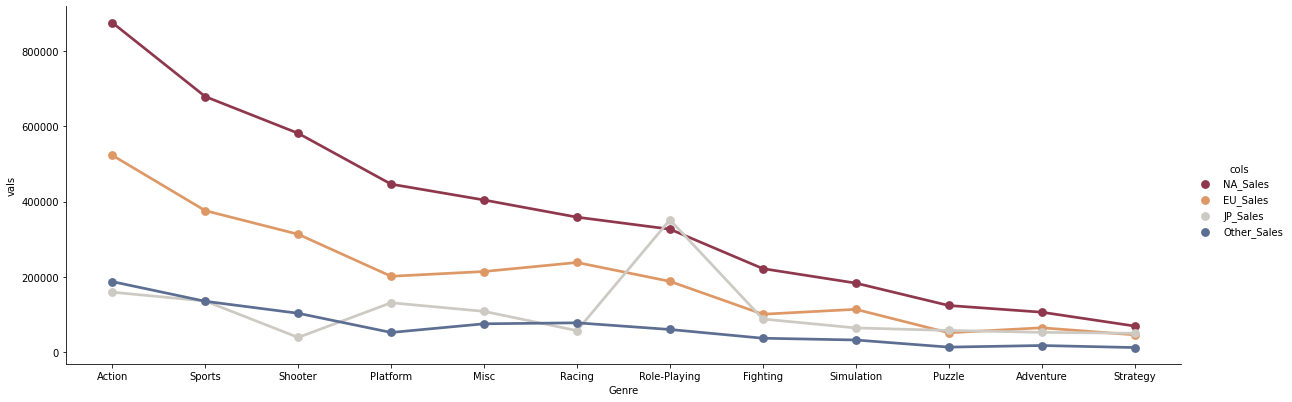

In [28]:
# ÏßÄÏó≠Î≥Ñ - Í≤åÏûÑ Ïû•Î•¥Î≥Ñ Îß§Ï∂ú Ìï©Í≥Ñ Í∑∏ÎûòÌîÑ

df1genresum = df1genresum.sort_values(by='NA_Sales', ascending=False) #Î∂ÅÎØ∏ÏßÄÏó≠ Îß§Ï∂ú ÏàúÏúÑÎ°ú Ï†ïÎ†¨
df1sum = df1genresum.reset_index().melt('Genre', var_name='cols',  value_name='vals')
palette = {"EU_Sales":"#dd9866", "NA_Sales":"#8f384d", "Other_Sales":"#5c6e91", "JP_Sales":"#cdc9c3"}
sns.catplot(x="Genre", y="vals", hue='cols', data=df1sum, height=5.5, aspect=3, kind = 'point', palette=palette);

üëâ Î∂ÅÎØ∏ÏßÄÏó≠ÏùÄ Í∞ÄÏû• Îß§Ï∂úÏù¥ ÎÜíÏùÄ ÏßÄÏó≠Ïù¥Îã§. Î∂ÅÎØ∏ ÏßÄÏó≠Ïùò Îß§Ï∂ú ÏàúÏúÑÎ°ú Îã§Î•∏ ÏßÄÏó≠Îì§Ïùò Îß§Ï∂úÏùÑ Í∑∏Î†§ Î≥¥Î©¥, Î∂ÅÎØ∏ÏôÄ Ïú†ÎüΩ, Îã§Î•∏ ÏßÄÏó≠Ïùò Ïû•Î•¥Î≥Ñ Îß§Ï∂úÏï° Í∑∏ÎûòÌîÑÎäî Ïú†ÏÇ¨Ìïú ÎùºÏù∏ÏùÑ Í∑∏Î¶¨Îäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§.

üëâ Ïú†ÎüΩÏßÄÏó≠Ïùò Í≤ΩÏö∞ 1-3ÏúÑÎäî Î∂ÅÎØ∏ÏôÄ Í∞ôÏßÄÎßå, Î†àÏù¥Ïã± Í≤åÏûÑÏù¥ ÌîåÎû´Ìèº Í≤åÏûÑÎ≥¥Îã§ Ïù∏Í∏∞ÏûàÎã§Îäî Ï†êÏù¥ Î∂ÅÎØ∏ÏôÄ Îã§Î•¥Îã§. (Í∏∞ÌÉÄÏßÄÏó≠ÏóêÏÑúÎèÑ Î†àÏù¥Ïã± Í≤åÏûÑÏùÄ 4ÏúÑÎã§.)


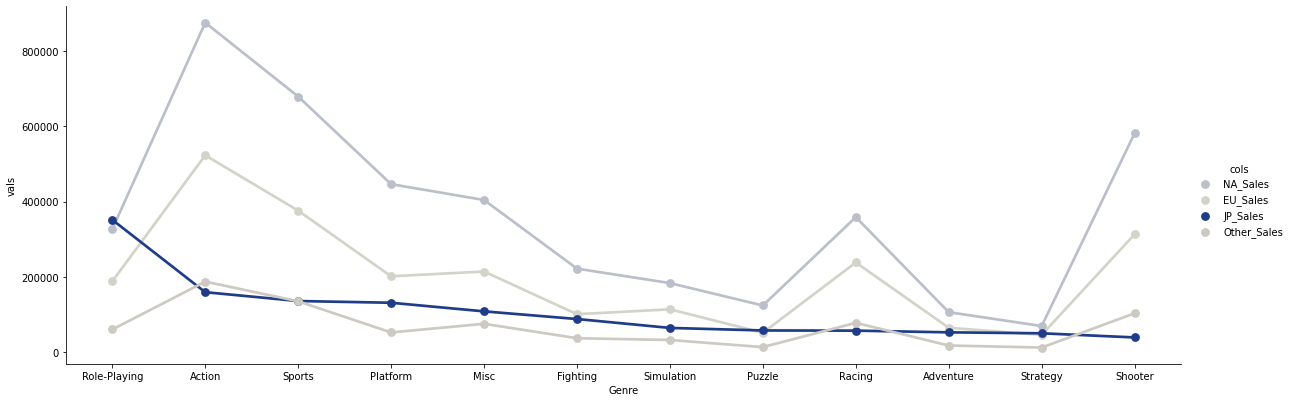

In [29]:
df1genresum = df1genresum.sort_values(by='JP_Sales', ascending=False) #ÏùºÎ≥∏ÏßÄÏó≠ Îß§Ï∂ú ÏàúÏúÑÎ°ú Ï†ïÎ†¨
df1sum = df1genresum.reset_index().melt('Genre', var_name='cols',  value_name='vals')
palette = {"EU_Sales":"#d2d3c9", "NA_Sales":"#bbbfca", "Other_Sales":"#cdc9c3", "JP_Sales":"#1f3c88"}
sns.catplot(x="Genre", y="vals", hue='cols', data=df1sum, height=5.5, aspect=3, kind = 'point', palette=palette);

ÏùºÎ≥∏ ÏßÄÏó≠ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ïû•Î•¥Î≥Ñ Îß§Ï∂úÏùÑ Ïû¨Ï†ïÎ†¨ÌñàÎã§.

In [30]:
rank_by_sales.sort_values(by='JP') # Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÏàúÏúÑ - ÏùºÎ≥∏ Í∏∞Ï§Ä

NA    JP    EU  Other
Genre                                
Role-Playing   7.0   1.0   7.0    6.0
Action         1.0   2.0   1.0    1.0
Sports         2.0   3.0   2.0    2.0
Platform       4.0   4.0   6.0    7.0
Misc           5.0   5.0   5.0    5.0
Fighting       8.0   6.0   9.0    8.0
Simulation     9.0   7.0   8.0    9.0
Puzzle        10.0   8.0  11.0   11.0
Racing         6.0   9.0   4.0    4.0
Adventure     11.0  10.0  10.0   10.0
Strategy      12.0  11.0  12.0   12.0
Shooter        3.0  12.0   3.0    3.0

üëâ ÏùºÎ≥∏Ïùò Í≤ΩÏö∞ Î∂ÅÎØ∏, Ïú†ÎüΩÍ≥º Îã§Î•¥Í≤å Î°§ÌîåÎ†àÏûâ Í≤åÏûÑÏù¥ Í∞ÄÏû• Ïù∏Í∏∞Í∞Ä ÎßéÎã§. Î∂ÅÎØ∏, Ïú†ÎüΩÏùò Í≤ΩÏö∞ Ïï°ÏÖò Í≤åÏûÑÏù¥ 1ÏúÑÎ°ú Îß§Ï∂úÏù¥ Îã§Î•∏ Ïû•Î•¥Î≥¥Îã§ ÎëêÎìúÎü¨ÏßÄÎßå ÏïïÎèÑÏ†ÅÏù¥ÏßÄÎäî ÏïäÏùÄ Î∞òÎ©¥, ÏùºÎ≥∏Ïùò Î°§ÌîåÎ†àÏûâ Í≤åÏûÑ Îß§Ï∂úÏùÄ 2ÏúÑÏù∏ Ïï°ÏÖò Í≤åÏûÑ Îß§Ï∂úÍ≥º 2Î∞∞ Ïù¥ÏÉÅÏùò Ï∞®Ïù¥Î•º Î≥¥Ïù∏Îã§. 

Ìù•ÎØ∏Î°úÏö¥ Ï†êÏùÄ Î∂ÅÎØ∏, Ïú†ÎüΩÏóêÏÑú Ïù∏Í∏∞ÏûàÎçò ÏÇ¨Í≤©(Shooter) Í≤åÏûÑÏùò Í≤ΩÏö∞ ÏùºÎ≥∏ÏóêÏÑú Í∞ÄÏû• Ïù∏Í∏∞ÏóÜÎäî Ïû•Î•¥Ïóê ÏÜçÌïúÎã§. 

Î†àÏù¥Ïã± Í≤åÏûÑÏùò Í≤ΩÏö∞ Îã§Î•∏ ÏßÄÏó≠ÏóêÏÑúÎäî Îß§Ï∂ú 4-6ÏúÑÏù∏ Î∞òÎ©¥, ÏùºÎ≥∏ÏóêÏÑúÎäî 9ÏúÑÎ°ú Ïù∏Í∏∞ ÏûàÎäî Ìé∏Ïù¥ ÏïÑÎãàÎã§.

Î∞òÎ©¥ ÏùºÎ≥∏ÏùÑ Ï†úÏô∏Ìïú Îã§Î•∏ ÏßÄÏó≠ÏóêÏÑú Í∞ÄÏû• Ïù∏Í∏∞ ÏóÜÎäî Ïû•Î•¥Îäî Ï†ÑÎûµ(Strategy)Ïù¥Îã§.

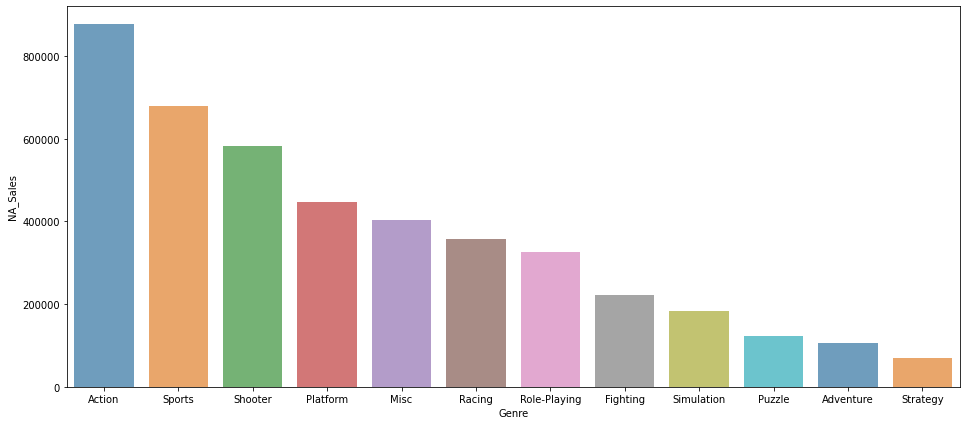

In [31]:
#Î∂ÅÎØ∏ÏßÄÏó≠ Îß§Ï∂ú ÏàúÏúÑÎ°ú Ï†ïÎ†¨

df1genresum = df1genresum.sort_values(by='NA_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="NA_Sales", palette="tab10", alpha=.7);

üëâ Î∂ÅÎØ∏ÏßÄÏó≠ÏùÄ Í∞ÄÏû• Îß§Ï∂úÏù¥ ÎÜíÏùÄ ÏßÄÏó≠Ïù¥Îã§. 
Ïï°ÏÖò, Ïä§Ìè¨Ï∏†, ÏÇ¨Í≤©, ÌîåÎû´Ìèº Í≤åÏûÑÏù¥ Í∞ïÏÑ∏Î•º Î≥¥Ïù∏Îã§. 

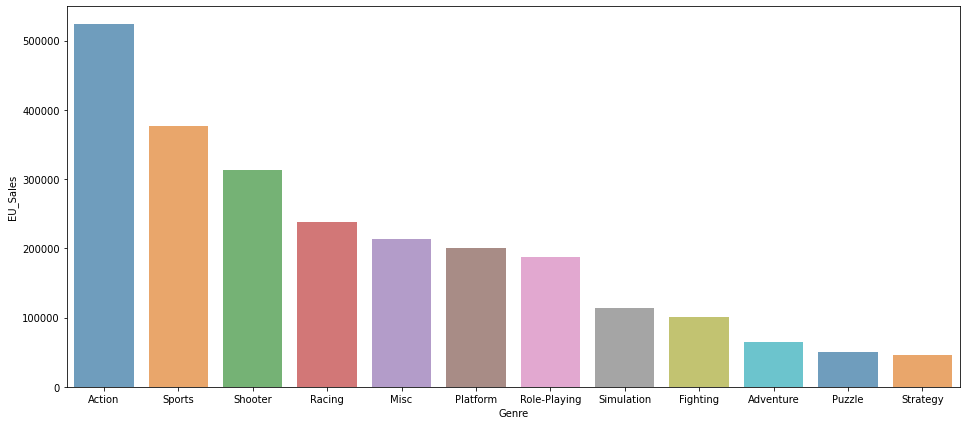

In [32]:
#Ïú†ÎüΩÏßÄÏó≠ Îß§Ï∂ú ÏàúÏúÑÎ°ú Ï†ïÎ†¨

df1genresum = df1genresum.sort_values(by='EU_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="EU_Sales", palette="tab10", alpha=.7);

üëâ Ïú†ÎüΩÏßÄÏó≠Ïùò Í≤ΩÏö∞ 1-3ÏúÑÎäî Î∂ÅÎØ∏ÏôÄ Í∞ôÏßÄÎßå, Î†àÏù¥Ïã± Í≤åÏûÑÏù¥ ÌîåÎû´Ìèº Í≤åÏûÑÎ≥¥Îã§ Ïù∏Í∏∞ÏûàÎã§Îäî Ï†êÏù¥ Î∂ÅÎØ∏ÏôÄ Îã§Î•¥Îã§.



In [33]:
#ÏùºÎ≥∏ Îß§Ï∂ú ÏàúÏúÑÎ°ú Ï†ïÎ†¨

df1genresum = df1genresum.sort_values(by='JP_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="JP_Sales", palette="tab10", alpha=.7);

üëâ ÏùºÎ≥∏Ïùò Í≤ΩÏö∞ Î∂ÅÎØ∏, Ïú†ÎüΩÍ≥º Îã§Î•¥Í≤å Î°§ÌîåÎ†àÏûâ Í≤åÏûÑÏù¥ Í∞ÄÏû• Ïù∏Í∏∞Í∞Ä ÎßéÎã§. Î∂ÅÎØ∏, Ïú†ÎüΩÏùò Í≤ΩÏö∞ Ïï°ÏÖò Í≤åÏûÑÏù¥ 1ÏúÑÎ°ú Îß§Ï∂úÏù¥ Îã§Î•∏ Ïû•Î•¥Î≥¥Îã§ ÎëêÎìúÎü¨ÏßÄÎßå ÏïïÎèÑÏ†ÅÏù¥ÏßÄÎäî ÏïäÏùÄ Î∞òÎ©¥, ÏùºÎ≥∏Ïùò Î°§ÌîåÎ†àÏûâ Í≤åÏûÑ Îß§Ï∂úÏùÄ 2ÏúÑÏù∏ Ïï°ÏÖò Í≤åÏûÑ Îß§Ï∂úÍ≥º 2Î∞∞ Ïù¥ÏÉÅÏùò Ï∞®Ïù¥Î•º Î≥¥Ïù∏Îã§. 

Ìù•ÎØ∏Î°úÏö¥ Ï†êÏùÄ Î∂ÅÎØ∏, Ïú†ÎüΩÏóêÏÑú Ïù∏Í∏∞ÏûàÎçò ÏÇ¨Í≤©(Shooter) Í≤åÏûÑÏùò Í≤ΩÏö∞ ÏùºÎ≥∏ÏóêÏÑú Í∞ÄÏû• Ïù∏Í∏∞ÏóÜÎäî Ïû•Î•¥Ïóê ÏÜçÌïúÎã§.

In [34]:
#Í∏∞ÌÉÄÏßÄÏó≠ Îß§Ï∂ú ÏàúÏúÑÎ°ú Ï†ïÎ†¨

df1genresum = df1genresum.sort_values(by='Other_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="Other_Sales", palette="tab10", alpha=.7);

# Ïó∞ÎèÑÎ≥Ñ Í≤åÏûÑÏùò Ìä∏Î†åÎìúÍ∞Ä ÏûàÏùÑÍπå?

In [53]:
# Ï¥ùÎß§Ï∂ú ÏàúÏúÑÎ≥ÑÎ°ú Ï†ïÎ†¨Ìïú df ÎßåÎì§Í∏∞

df2 = df.sort_values(by='Sales_Sum', ascending=False)[['Name',	'Platform',	'Year',	'Genre',	'Publisher', 'Sales_Sum']].reset_index()
del df2['index']
df2

Name  ... Sales_Sum
0                                            Wii Sports  ...   82740.0
1                                     Super Mario Bros.  ...   40240.0
2                                        Mario Kart Wii  ...   35830.0
3                                     Wii Sports Resort  ...   33000.0
4                              Pokemon Red/Pokemon Blue  ...   31380.0
...                                                 ...  ...       ...
16491                             Ouka Sengoku Portable  ...      10.0
16492                                   Palais de Reine  ...      10.0
16493                            DoDonPachi Saidaioujou  ...      10.0
16494                    Fate/kaleid liner Prisma Illya  ...      10.0
16495  SCORE International Baja 1000: The Official Game  ...       0.0

[16496 rows x 6 columns]

In [ ]:
yearcount = df2.groupby(by="Year").Name.count() #Ïó∞ÎèÑÎ≥Ñ Ï∂úÏãúÎêú Í≤åÏûÑ Ïà´Ïûê
yearcount

In [73]:
yearcount.plot(kind='bar', figsize=(16, 6));

94ÎÖÑÎèÑÎ∂ÄÌÑ∞ Ìïú Ìï¥ Ï∂úÏãúÎêòÎäî Í≤åÏûÑÏùÄ 100Í∞úÍ∞Ä ÎÑòÏñ¥, 2008-2009ÎÖÑÏóêÎäî Ï∂úÏãúÎêú Í≤åÏûÑÏùò ÏàòÍ∞Ä Í∞ÄÏû• ÎßéÏïòÎã§. 2009ÎÖÑ Ïù¥ÌõÑÎ∂ÄÌÑ∞Îäî ÌïòÎùΩÏÑ∏Î•º Î≥¥Ïù∏Îã§.

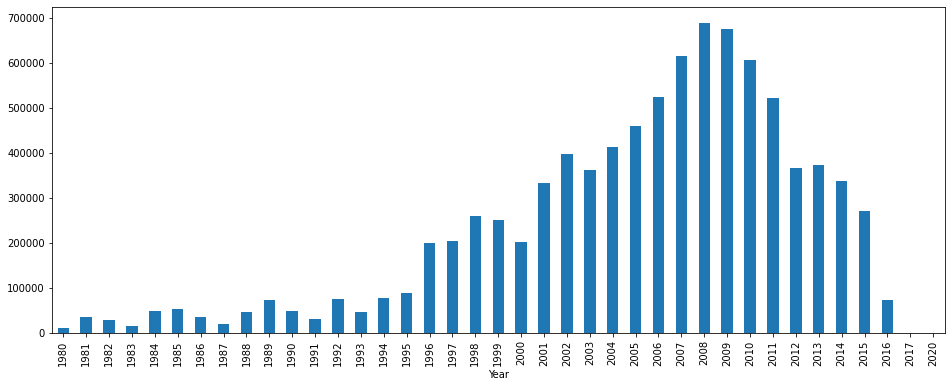

In [82]:
#Ïó∞ÎèÑÎ≥Ñ Í≤åÏûÑ ÏÇ∞ÏóÖ Îß§Ï∂ú Ï¥ùÏï°(Î™®Îì† ÏßÄÏó≠)

yearsales = df2.groupby(by="Year").Sales_Sum.sum()
yearsales.plot(kind='bar', figsize=(16, 6));

Ïó∞ÎèÑÎ≥Ñ Í≤åÏûÑÏùò ÌåêÎß§ Ï¥ùÏï° Í∑∏ÎûòÌîÑÎã§. Ïó≠Ïãú 2008-2009ÎÖÑÏù¥ Îß§Ï∂úÏù¥ Í∞ÄÏû• ÎÜíÏïÑ, Í≤åÏûÑÏùò Ï†ÑÏÑ±Í∏∞ÏòÄÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. 2008ÎÖÑ Ïù¥ÌõÑ ÌïòÎùΩÏÑ∏Î•º Î≥¥Ïù∏Îã§. 

Ïó∞ÎèÑÎ≥Ñ Ï∂úÏãú Í≤åÏûÑ ÏàòÎäî 1991ÎÖÑ Ïù¥ÌõÑ Ï¶ùÍ∞ÄÌñàÎäîÎç∞, Í∑∏ Ï†ÑÍπåÏßÄ Í≤åÏûÑÏùò Îß§Ï∂úÏùÄ Îì§Ï≠âÎÇ†Ï≠âÌñàÏßÄÎßå Ïñ¥ÎäêÏ†ïÎèÑ ÏàòÏöîÍ∞Ä ÏûàÏóàÎã§. 1991ÎÖÑ Ïù¥ÌõÑ,  Î∞úÎß§ÎêòÎäî Í≤åÏûÑ Ïàò Ï¶ùÍ∞ÄÏôÄ ÎçîÎ∂àÏñ¥ Îß§Ï∂ú Ïó≠Ïãú ÎπÑÏä∑Ìïú Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¨Î©∞ ÎäòÏóàÎã§.

Ìù•ÎØ∏Î°úÏö¥ Ï†êÏùÄ 2013-2015ÎÖÑÏóê Ïó∞ÎèÑÎ≥Ñ Ï∂úÏãúÎêòÎäî Í≤åÏûÑÏùò ÏàòÎäî ÎäòÏóàÏßÄÎßå, Í≤åÏûÑÏùò Îß§Ï∂úÏùÄ Í≥ÑÏÜç ÌïòÎùΩÌñàÎã§Îäî Í≤ÉÏù¥Îã§. 

In [105]:
yeargenre  = df2.groupby(by=["Year", "Genre"]).count().reset_index()
yeargenre = yeargenre.iloc[:,0:3].rename(columns={'Name': 'Count'})
yeargenre

Year         Genre  Count
0    1980        Action      2
1    1980      Fighting      1
2    1980          Misc      4
3    1980       Shooter      2
4    1981        Action     25
..    ...           ...    ...
383  2016        Sports     38
384  2016      Strategy     10
385  2017        Action      1
386  2017  Role-Playing      2
387  2020    Simulation      1

[388 rows x 3 columns]

In [166]:
#Ïó∞ÎèÑÏàúÏúºÎ°ú ÎÇòÎà†Ï§å
early = df2[df2['Year'] <1995]
mid = df2[(1995<= df2['Year']) & (df2['Year']<2010)]
late = df2[df2['Year'] >=2010]

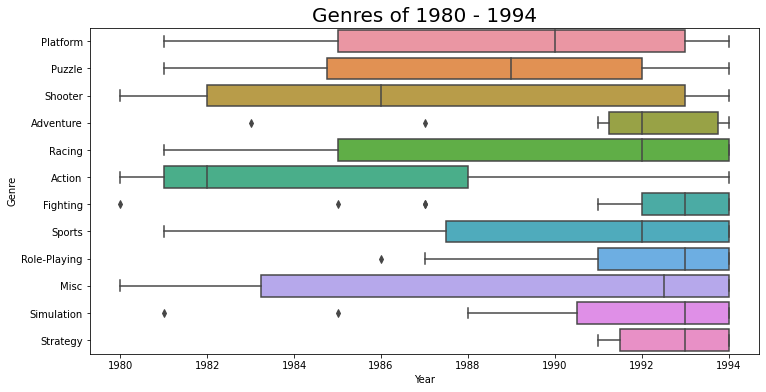

In [172]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = early.reset_index(), x='Year', y='Genre');
plt.title('Genres of 1980 - 1994', fontsize = 20);

In [173]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = mid.reset_index(), x='Year', y='Genre');
plt.title('Genres of 1995 - 2009', fontsize = 20);

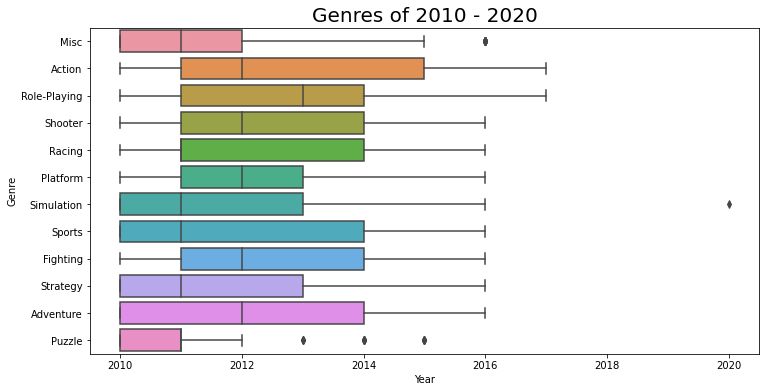

In [174]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = late.reset_index(), x='Year', y='Genre');
plt.title('Genres of 2010 - 2020', fontsize = 20);

In [148]:
sns.boxplot(data = df2, x='Year', y='Genre');

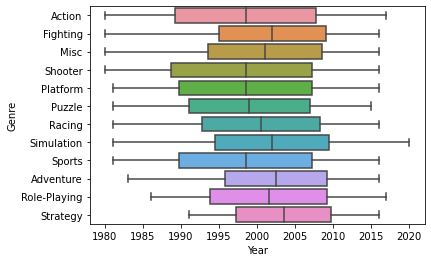

In [147]:
sns.boxplot(data = yeargenre, x='Year', y='Genre')

In [99]:
# yeargenre  = df2.groupby(by=["Year", "Genre"]).count().reset_index()
yeargenre_melt = df2.melt(id_vars=['Year'], value_vars=['Genre'], var_name='var',  value_name='vals')
sns.catplot(x="Year", y="vals", data=yeargenre_melt, height=5.5, aspect=3, kind = 'point');

In [47]:
df.groupby(by=["Year",'Platform']).count()

Name  Genre  Publisher  ...  Other_Sales  Sales_Sum  Sales_Mean
Year Platform                          ...                                    
1980 2600         8      8          8  ...            8          8           8
     X360         1      1          1  ...            1          1           1
1981 2600        46     46         46  ...           46         46          46
1982 2600        36     36         36  ...           36         36          36
     PS2          1      1          1  ...            1          1           1
...             ...    ...        ...  ...          ...        ...         ...
2016 X360         8      8          8  ...            8          8           8
     XOne        54     54         54  ...           54         54          54
2017 PS4          1      1          1  ...            1          1           1
     PSV          2      2          2  ...            2          2           2
2020 DS           1      1          1  ...            1          1           1

[328 rows x 9 columns]

# Îß§Ï∂úÏù¥ ÎÜíÏùÄ Í≤åÏûÑÏóê ÎåÄÌïú Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî ÌîÑÎ°úÏÑ∏Ïä§

In [36]:
df.sort_values(by=["Sales_Sum"], ascending=False)  # Îß§Ï∂ú ÌÉë 100ÏúÑ Ï†ïÎ†¨

Name  ... Sales_Mean
2895                                         Wii Sports  ...    20685.0
4173                                  Super Mario Bros.  ...    10060.0
12504                                    Mario Kart Wii  ...     8957.5
3337                                  Wii Sports Resort  ...     8250.0
7784                           Pokemon Red/Pokemon Blue  ...     7845.0
...                                                 ...  ...        ...
12142                             Ouka Sengoku Portable  ...        2.5
936                                     Palais de Reine  ...        2.5
6430                             DoDonPachi Saidaioujou  ...        2.5
5836                     Fate/kaleid liner Prisma Illya  ...        2.5
5564   SCORE International Baja 1000: The Official Game  ...        0.0

[16496 rows x 11 columns]

-> Îã§Ïùå Î∂ÑÍ∏∞ Îïå Ïñ¥Îñ§ Í≤åÏûÑÏùÑ ÎßåÎì§Íπå?

# Í∞úÏù∏Ï†ÅÏù∏ Î∂ÑÏÑù Î™©Ìëú, ÏßàÎ¨∏

In [37]:
# Two Sample T-Test
import scipy.stats as stats
print("Î∂ÅÎØ∏ÏßÄÏó≠Í≥º ÏùºÎ≥∏ ÎπÑÍµê : ", stats.ttest_ind(df1genresum.NA_Sales, df1genresum.JP_Sales))

Î∂ÅÎØ∏ÏßÄÏó≠Í≥º ÏùºÎ≥∏ ÎπÑÍµê :  Ttest_indResult(statistic=3.376238024954456, pvalue=0.0027212353068000643)


In [38]:
print("Î∂ÅÎØ∏ÏßÄÏó≠Í≥º Ïú†ÎüΩ ÎπÑÍµê : ", stats.ttest_ind(df1genresum.NA_Sales, df1genresum.EU_Sales))

Î∂ÅÎØ∏ÏßÄÏó≠Í≥º Ïú†ÎüΩ ÎπÑÍµê :  Ttest_indResult(statistic=1.94977163437725, pvalue=0.06406233427397107)


‚ÄºÔ∏è T-Test, ÏïÑÎÖ∏Î∞îÎäî ÌèâÍ∑† Îß§Í∏∞ÎäîÍ±∞ÏûÑ... Ïû•Î•¥Î≥Ñ Îû≠ÌÇπ ÏàúÏúÑÏóêÎäî Ï†ÅÌï©ÌïòÏßÄ ÏïäÎã§!

In [39]:
# Anova

import scipy.stats as stats
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
F_statistic, pVal = stats.f_oneway(rank_by_sales.NA, rank_by_sales.EU, rank_by_sales.JP, rank_by_sales.Other) 
print('4Í∞ú Í∑∏Î£πÎç∞Ïù¥ÌÑ∞Ïùò ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù Í≤∞Í≥º : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))

4Í∞ú Í∑∏Î£πÎç∞Ïù¥ÌÑ∞Ïùò ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù Í≤∞Í≥º : F=0.0, p=1.00000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


‚ùì Ïôú ÏïÑÎÖ∏Î∞î pÍ∞íÏù¥ Îã§ 1Ïù¥ ÎÇòÏò§ÏßÄ...
Îû≠ÌÇπ Îß§Í∏∞Î©¥ Îã§ Îû≠ÌÇπÏù¥ 1-12ÏúÑ ÏàúÏù¥Îùº pvalueÍ∞Ä ÎòëÍ∞ôÏù¥ ÎÇòÏò§ÎÇò?? 

4Í∞ú Í∑∏Î£πÏùò Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÏàúÏúÑÎ•º ÏïÑÎÖ∏Î∞î ÌÖåÏä§Ìä∏Î°ú ÎπÑÍµêÌïú Í≤∞Í≥º pvalueÎäî 1Ïù¥Îã§. 



‚ÄºÔ∏è Ï¥àÍ∏∞Ïóê ÏÑ§Ï†ïÌïú Î™©ÌëúÏóê ÎåÄÌïú Í≤∞Î°†Ïù¥ ÎÇòÏôÄÏïº Ìï®

Í∑∏ÎûòÏÑú Îã§Ïùå Î∂ÑÍ∏∞ÏóêÎäî Ïñ¥Îñ§ Í≤åÏûÑÏùÑ ÎßåÎì§Í±¥Îç∞?

Ïó∞ÎèÑÎ≥Ñ Ï∂úÏãúÎêòÎäî Í≤åÏûÑ ÏàòÏôÄ Îß§Ï∂úÏï° Ïó∞Í¥ÄÏÑ± ÎπÑÍµê - 2sample chi-square test

image.png

Ï∂úÏ≤ò : Î∂ÅÎØ∏ Î∞è Ïú†ÎüΩ Ï£ºÏöîÍµ≠ Í≤åÏûÑÏãúÏû• ÌòÑÌô©Ï°∞ÏÇ¨, 2019